In [128]:
%matplotlib inline

In [129]:
import pandas as pd
train_set = pd.read_csv('/Users/paulbrenotvinciguerra/Desktop/all/train.csv', index_col=0)
test_set = pd.read_csv('/Users/paulbrenotvinciguerra/Desktop/all/test.csv', index_col=0)

In [130]:
test_set.columns
y=train_set_c['Target']
X=train_set_c.drop(['Target'], axis=1)
X_test1=test_set

In [131]:
train_set.info()
train_set_c = train_set
train_set_c.dropna(inplace=True)
print('Number of NaN: '+str(train_set.isnull().sum().sum()))

<class 'pandas.core.frame.DataFrame'>
Index: 9557 entries, ID_279628684 to ID_a38c64491
Columns: 142 entries, v2a1 to Target
dtypes: float64(8), int64(130), object(4)
memory usage: 10.4+ MB
Number of NaN: 0


In [132]:
for col in train_set_c:
    if train_set_c[col].values.dtype == object:
        train_set_c.drop(col, axis=1, inplace=True)
train_set_c.select_dtypes(include='object').shape

(156, 0)

In [135]:
train_set_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156 entries, ID_d671db89c to ID_9750f0adc
Columns: 138 entries, v2a1 to Target
dtypes: int64(138)
memory usage: 174.4+ KB


In [172]:
for col in train_set_c:
    if (train_set_c[[col]].corrwith(y) >= train_set_c.corrwith(y).mean()).bool() == False:
        train_set_c.drop(col, inplace=True, axis=1)

In [137]:
train_set_c.head()

,v2a1,hacdor,rooms,hacapo,v18q1,r4h1,r4h2,r4h3,r4t2,escolari,...,male,parentesco6,hogar_adul,meaneduc,instlevel4,tipovivi2,qmobilephone,lugar1,SQBedjefe,Target
Id,,,,,,,,,,,,,,,,,,,,,
ID_d671db89c,180000,0,5,0,1,0,2,2,3,9,...,1,0,2,11,1,0,3,1,121,4
ID_e9e0c1100,180000,0,5,0,1,0,2,2,3,2,...,0,0,2,11,0,0,3,1,121,4
ID_dd93e20ec,350000,0,6,0,3,0,1,1,3,10,...,0,0,2,16,1,1,4,1,256,4
ID_651377e3e,260000,0,5,0,3,1,2,3,3,1,...,1,0,2,9,0,0,5,1,100,4
ID_272bdf973,260000,0,5,0,3,1,2,3,3,6,...,1,0,2,9,0,0,5,1,100,4


In [138]:
train_set['Target'].value_counts()/train_set['Target'].sum()

4    0.228669
3    0.018771
2    0.010239
1    0.008532
Name: Target, dtype: float64

In [139]:
train_set_c['Target'].value_counts()/train_set_c['Target'].sum()

4    0.228669
3    0.018771
2    0.010239
1    0.008532
Name: Target, dtype: float64

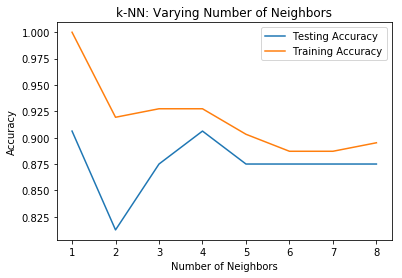

In [140]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

# Scale the features: X_scaled
X_scaled = scale(X)

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [141]:
y.value_counts()

4    134
3     11
2      6
1      5
Name: Target, dtype: int64

In [142]:
train_set_c['Target'].value_counts()

4    134
3     11
2      6
1      5
Name: Target, dtype: int64

In [143]:
from sklearn.metrics import classification_report
classification_report(y_test, y_pred)

/Users/paulbrenotvinciguerra/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


'             precision    recall  f1-score   support\n\n          1       0.00      0.00      0.00         1\n          2       0.00      0.00      0.00         1\n          3       0.00      0.00      0.00         2\n          4       0.88      1.00      0.93        28\n\navg / total       0.77      0.88      0.82        32\n'

In [173]:
from sklearn.metrics import f1_score
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
f1_score(y_test, knn.predict(X_test), average='macro')

/Users/paulbrenotvinciguerra/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.6535087719298245

In [178]:
X_test.index

Index(['ID_9f8605bdd', 'ID_1bf9c65aa', 'ID_a86750e14', 'ID_456457f31',
       'ID_cec76e220', 'ID_1aede575d', 'ID_2f2ebc646', 'ID_6880f8d79',
       'ID_8ab344c93', 'ID_769215b79', 'ID_73c023bf0', 'ID_92b818c65',
       'ID_227736d73', 'ID_162135121', 'ID_2d957356f', 'ID_8d0848006',
       'ID_d9371cecd', 'ID_5b86c5ce8', 'ID_13e0dfe9b', 'ID_dd93e20ec',
       'ID_4be9d7086', 'ID_d5442184e', 'ID_624058c13', 'ID_216ca438b',
       'ID_02a405b3b', 'ID_8657e1d4e', 'ID_49f592f42', 'ID_16594415e',
       'ID_252e4d256', 'ID_74f23fb45', 'ID_6edc54f34', 'ID_7edf98c6e'],
      dtype='object', name='Id')